In [60]:
# Import required libraries and dependencies
import re
import matplotlib.pyplot as plt
import string
from nltk.corpus import stopwords
import nltk
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt 
import tensorflow as tf
import keras
import numpy as np
import pandas as pdequences
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint
from keras import regularizers
import seaborn as sns

In [61]:
train = pd.read_csv('Resources/data.csv', sep=',')

In [62]:
train.head(15)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [63]:
len(train)

27481

In [64]:
train['sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [65]:
train.groupby('sentiment').nunique()

,textID,text,selected_text
sentiment,,,
negative,7781,7781,5861
neutral,11118,11117,11111
positive,8582,8582,5537


In [66]:
train = train[['selected_text','sentiment']]
train.head()

,selected_text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD,negative
2,bullying me,negative
3,leave me alone,negative
4,"Sons of ****,",negative


In [67]:
train["selected_text"].isnull().sum()

1

In [68]:
train["selected_text"].fillna("No content", inplace = True)

In [69]:
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [70]:
temp = []
data_to_list = train['selected_text'].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

['I`d have responded, if I were going',
 'Sooo SAD',
 'bullying me',
 'leave me alone',
 'Sons of ****,']

In [71]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations
        

data_words = list(sent_to_words(temp))

print(data_words[:10])

[['have', 'responded', 'if', 'were', 'going'], ['sooo', 'sad'], ['bullying', 'me'], ['leave', 'me', 'alone'], ['sons', 'of'], ['some', 'shameless', 'plugging', 'for', 'the', 'best', 'rangers', 'forum', 'on', 'earth'], ['fun'], ['soooo', 'high'], ['both', 'of', 'you'], ['wow', 'just', 'became', 'cooler']]


In [72]:
len(data_words)

27481

In [73]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

In [74]:
data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['have responded if were going', 'sooo sad', 'bullying me', 'leave me alone', 'sons of']


In [75]:
data = np.array(data)

In [76]:
labels = np.array(train['sentiment'])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'negative':
        y.append(1)
    if labels[i] == 'positive':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [77]:
len(labels)

27481

In [78]:
max_words = 5000
max_len = 200

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ...   68  146   41]
 [   0    0    0 ...    0  397   65]
 [   0    0    0 ...    0    0   11]
 ...
 [   0    0    0 ...  372   10    3]
 [   0    0    0 ...   24  542    4]
 [   0    0    0 ... 2424  199  657]]


In [79]:
print(labels)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]]


In [80]:
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (len(X_train),len(X_test),len(y_train),len(y_test))

20610 6871 20610 6871


In [81]:
model0 = Sequential()
model0.add(layers.Embedding(max_words, 15))
model0.add(layers.SimpleRNN(15))
model0.add(layers.Dense(3,activation='softmax'))


model0.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint0 = ModelCheckpoint("best_model0.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model0.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test),callbacks=[checkpoint0])

Epoch 1/5
643/645 [============================>.] - ETA: 0s - loss: 0.8081 - accuracy: 0.6591
Epoch 1: val_accuracy improved from -inf to 0.74152, saving model to best_model0.hdf5
645/645 [==============================] - 18s 27ms/step - loss: 0.8079 - accuracy: 0.6592 - val_loss: 0.6660 - val_accuracy: 0.7415
Epoch 2/5
645/645 [==============================] - ETA: 0s - loss: 0.5784 - accuracy: 0.7832
Epoch 2: val_accuracy improved from 0.74152 to 0.77296, saving model to best_model0.hdf5
645/645 [==============================] - 17s 26ms/step - loss: 0.5784 - accuracy: 0.7832 - val_loss: 0.5735 - val_accuracy: 0.7730
Epoch 3/5
644/645 [============================>.] - ETA: 0s - loss: 0.4937 - accuracy: 0.8109
Epoch 3: val_accuracy improved from 0.77296 to 0.80076, saving model to best_model0.hdf5
645/645 [==============================] - 16s 25ms/step - loss: 0.4937 - accuracy: 0.8109 - val_loss: 0.5139 - val_accuracy: 0.8008
Epoch 4/5
643/645 [============================>.] -

In [82]:
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))

model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint1 = ModelCheckpoint("best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model1.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/70
645/645 [==============================] - ETA: 0s - loss: 0.8310 - accuracy: 0.6353
Epoch 1: val_accuracy improved from -inf to 0.70616, saving model to best_model1.hdf5
645/645 [==============================] - 31s 45ms/step - loss: 0.8310 - accuracy: 0.6353 - val_loss: 0.6825 - val_accuracy: 0.7062
Epoch 2/70
644/645 [============================>.] - ETA: 0s - loss: 0.5938 - accuracy: 0.7653
Epoch 2: val_accuracy improved from 0.70616 to 0.79130, saving model to best_model1.hdf5
645/645 [==============================] - 29s 45ms/step - loss: 0.5937 - accuracy: 0.7654 - val_loss: 0.5353 - val_accuracy: 0.7913
Epoch 3/70
645/645 [==============================] - ETA: 0s - loss: 0.5107 - accuracy: 0.8010
Epoch 3: val_accuracy improved from 0.79130 to 0.80643, saving model to best_model1.hdf5
645/645 [==============================] - 31s 49ms/step - loss: 0.5107 - accuracy: 0.8010 - val_loss: 0.4948 - val_accuracy: 0.8064
Epoch 4/70
645/645 [=============================

645/645 [==============================] - 27s 42ms/step - loss: 0.3499 - accuracy: 0.8694 - val_loss: 0.4248 - val_accuracy: 0.8435
Epoch 28/70
644/645 [============================>.] - ETA: 0s - loss: 0.3459 - accuracy: 0.8702
Epoch 28: val_accuracy did not improve from 0.84413
645/645 [==============================] - 27s 41ms/step - loss: 0.3459 - accuracy: 0.8702 - val_loss: 0.4283 - val_accuracy: 0.8325
Epoch 29/70
644/645 [============================>.] - ETA: 0s - loss: 0.3442 - accuracy: 0.8720
Epoch 29: val_accuracy did not improve from 0.84413
645/645 [==============================] - 29s 45ms/step - loss: 0.3442 - accuracy: 0.8720 - val_loss: 0.4253 - val_accuracy: 0.8401
Epoch 30/70
645/645 [==============================] - ETA: 0s - loss: 0.3438 - accuracy: 0.8736
Epoch 30: val_accuracy did not improve from 0.84413
645/645 [==============================] - 29s 45ms/step - loss: 0.3438 - accuracy: 0.8736 - val_loss: 0.4320 - val_accuracy: 0.8414
Epoch 31/70
644/645 [

645/645 [==============================] - 30s 46ms/step - loss: 0.3224 - accuracy: 0.8821 - val_loss: 0.4263 - val_accuracy: 0.8434
Epoch 57/70
645/645 [==============================] - ETA: 0s - loss: 0.3210 - accuracy: 0.8801
Epoch 57: val_accuracy did not improve from 0.84471
645/645 [==============================] - 30s 46ms/step - loss: 0.3210 - accuracy: 0.8801 - val_loss: 0.4409 - val_accuracy: 0.8380
Epoch 58/70
645/645 [==============================] - ETA: 0s - loss: 0.3240 - accuracy: 0.8800
Epoch 58: val_accuracy did not improve from 0.84471
645/645 [==============================] - 31s 47ms/step - loss: 0.3240 - accuracy: 0.8800 - val_loss: 0.4316 - val_accuracy: 0.8428
Epoch 59/70
644/645 [============================>.] - ETA: 0s - loss: 0.3181 - accuracy: 0.8828
Epoch 59: val_accuracy did not improve from 0.84471
645/645 [==============================] - 31s 49ms/step - loss: 0.3181 - accuracy: 0.8828 - val_loss: 0.4334 - val_accuracy: 0.8447
Epoch 60/70
644/645 [

In [83]:
model2 = Sequential()
model2.add(layers.Embedding(max_words, 40, input_length=max_len))
model2.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model2.add(layers.Dense(3,activation='softmax'))
model2.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
checkpoint2 = ModelCheckpoint("best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model2.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/70
644/645 [============================>.] - ETA: 0s - loss: 0.8045 - accuracy: 0.6374
Epoch 1: val_accuracy improved from -inf to 0.70252, saving model to best_model2.hdf5
645/645 [==============================] - 44s 64ms/step - loss: 0.8044 - accuracy: 0.6374 - val_loss: 0.6852 - val_accuracy: 0.7025
Epoch 2/70
644/645 [============================>.] - ETA: 0s - loss: 0.5798 - accuracy: 0.7674
Epoch 2: val_accuracy improved from 0.70252 to 0.79042, saving model to best_model2.hdf5
645/645 [==============================] - 40s 61ms/step - loss: 0.5798 - accuracy: 0.7673 - val_loss: 0.5330 - val_accuracy: 0.7904
Epoch 3/70
644/645 [============================>.] - ETA: 0s - loss: 0.5036 - accuracy: 0.8039
Epoch 3: val_accuracy improved from 0.79042 to 0.79173, saving model to best_model2.hdf5
645/645 [==============================] - 39s 60ms/step - loss: 0.5035 - accuracy: 0.8039 - val_loss: 0.5146 - val_accuracy: 0.7917
Epoch 4/70
644/645 [============================>

Epoch 28/70
644/645 [============================>.] - ETA: 0s - loss: 0.3399 - accuracy: 0.8749
Epoch 28: val_accuracy did not improve from 0.84063
645/645 [==============================] - 34s 53ms/step - loss: 0.3398 - accuracy: 0.8749 - val_loss: 0.4315 - val_accuracy: 0.8401
Epoch 29/70
644/645 [============================>.] - ETA: 0s - loss: 0.3334 - accuracy: 0.8774
Epoch 29: val_accuracy did not improve from 0.84063
645/645 [==============================] - 35s 54ms/step - loss: 0.3333 - accuracy: 0.8774 - val_loss: 0.4337 - val_accuracy: 0.8405
Epoch 30/70
644/645 [============================>.] - ETA: 0s - loss: 0.3294 - accuracy: 0.8795
Epoch 30: val_accuracy improved from 0.84063 to 0.84224, saving model to best_model2.hdf5
645/645 [==============================] - 35s 53ms/step - loss: 0.3294 - accuracy: 0.8795 - val_loss: 0.4267 - val_accuracy: 0.8422
Epoch 31/70
644/645 [============================>.] - ETA: 0s - loss: 0.3312 - accuracy: 0.8782
Epoch 31: val_accur

645/645 [==============================] - 39s 60ms/step - loss: 0.3034 - accuracy: 0.8894 - val_loss: 0.4406 - val_accuracy: 0.8415
Epoch 57/70
644/645 [============================>.] - ETA: 0s - loss: 0.2988 - accuracy: 0.8917
Epoch 57: val_accuracy did not improve from 0.84602
645/645 [==============================] - 39s 61ms/step - loss: 0.2988 - accuracy: 0.8917 - val_loss: 0.4456 - val_accuracy: 0.8415
Epoch 58/70
644/645 [============================>.] - ETA: 0s - loss: 0.3013 - accuracy: 0.8898
Epoch 58: val_accuracy did not improve from 0.84602
645/645 [==============================] - 36s 56ms/step - loss: 0.3013 - accuracy: 0.8898 - val_loss: 0.4435 - val_accuracy: 0.8421
Epoch 59/70
644/645 [============================>.] - ETA: 0s - loss: 0.3006 - accuracy: 0.8913
Epoch 59: val_accuracy did not improve from 0.84602
645/645 [==============================] - 36s 56ms/step - loss: 0.3006 - accuracy: 0.8913 - val_loss: 0.4439 - val_accuracy: 0.8414
Epoch 60/70
644/645 [

In [84]:
model3 = Sequential()
model3.add(layers.Embedding(max_words, 40, input_length=max_len))
model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.MaxPooling1D(5))
model3.add(layers.Conv1D(20, 6, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=2e-3, l2=2e-3),bias_regularizer=regularizers.l2(2e-3)))
model3.add(layers.GlobalMaxPooling1D())
model3.add(layers.Dense(3,activation='softmax'))
model3.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['acc'])
checkpoint3 = ModelCheckpoint("best_model3.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history = model3.fit(X_train, y_train, epochs=70,validation_data=(X_test, y_test),callbacks=[checkpoint3])

Epoch 1/70
645/645 [==============================] - 6s 8ms/step - loss: 1.0297 - acc: 0.5647 - val_loss: 0.9005 - val_acc: 0.6105
Epoch 2/70
645/645 [==============================] - 5s 8ms/step - loss: 0.8559 - acc: 0.6208 - val_loss: 0.8302 - val_acc: 0.6303
Epoch 3/70
645/645 [==============================] - 5s 8ms/step - loss: 0.7598 - acc: 0.7157 - val_loss: 0.7338 - val_acc: 0.7507
Epoch 4/70
645/645 [==============================] - 5s 8ms/step - loss: 0.6757 - acc: 0.7746 - val_loss: 0.6911 - val_acc: 0.7690
Epoch 5/70
645/645 [==============================] - 5s 8ms/step - loss: 0.6356 - acc: 0.7853 - val_loss: 0.6569 - val_acc: 0.7705
Epoch 6/70
645/645 [==============================] - 5s 8ms/step - loss: 0.6100 - acc: 0.7916 - val_loss: 0.6500 - val_acc: 0.7650
Epoch 7/70
645/645 [==============================] - 5s 8ms/step - loss: 0.5907 - acc: 0.7984 - val_loss: 0.6705 - val_acc: 0.7711
Epoch 8/70
645/645 [==============================] - 5s 8ms/step - loss: 0.

645/645 [==============================] - 5s 7ms/step - loss: 0.3923 - acc: 0.8820 - val_loss: 0.5699 - val_acc: 0.7983
Epoch 29/70
645/645 [==============================] - 5s 8ms/step - loss: 0.3879 - acc: 0.8839 - val_loss: 0.5290 - val_acc: 0.8345
Epoch 30/70
645/645 [==============================] - 5s 8ms/step - loss: 0.3859 - acc: 0.8851 - val_loss: 0.5110 - val_acc: 0.8284
Epoch 31/70
645/645 [==============================] - 5s 7ms/step - loss: 0.3837 - acc: 0.8845 - val_loss: 0.5232 - val_acc: 0.8208
Epoch 32/70
645/645 [==============================] - 4s 7ms/step - loss: 0.3806 - acc: 0.8852 - val_loss: 0.5189 - val_acc: 0.8272
Epoch 33/70
645/645 [==============================] - 4s 7ms/step - loss: 0.3787 - acc: 0.8870 - val_loss: 0.5556 - val_acc: 0.8312
Epoch 34/70
645/645 [==============================] - 4s 7ms/step - loss: 0.3753 - acc: 0.8881 - val_loss: 0.5293 - val_acc: 0.8187
Epoch 35/70
645/645 [==============================] - 4s 7ms/step - loss: 0.3743

645/645 [==============================] - 5s 8ms/step - loss: 0.3343 - acc: 0.9049 - val_loss: 0.5680 - val_acc: 0.8271
Epoch 57/70
645/645 [==============================] - 5s 7ms/step - loss: 0.3323 - acc: 0.9073 - val_loss: 0.6119 - val_acc: 0.7866
Epoch 58/70
645/645 [==============================] - 5s 7ms/step - loss: 0.3314 - acc: 0.9078 - val_loss: 0.5723 - val_acc: 0.8089
Epoch 59/70
645/645 [==============================] - 4s 7ms/step - loss: 0.3296 - acc: 0.9075 - val_loss: 0.5645 - val_acc: 0.8163
Epoch 60/70
645/645 [==============================] - 5s 7ms/step - loss: 0.3288 - acc: 0.9069 - val_loss: 0.5543 - val_acc: 0.8278
Epoch 61/70
645/645 [==============================] - 5s 7ms/step - loss: 0.3266 - acc: 0.9083 - val_loss: 0.5676 - val_acc: 0.8239
Epoch 62/70
645/645 [==============================] - 4s 7ms/step - loss: 0.3252 - acc: 0.9092 - val_loss: 0.5708 - val_acc: 0.8283
Epoch 63/70
645/645 [==============================] - 5s 7ms/step - loss: 0.3232

In [85]:
best_model = keras.models.load_model("best_model2.hdf5")

In [86]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

215/215 - 3s - loss: 0.4366 - accuracy: 0.8460 - 3s/epoch - 13ms/step
Model accuracy:  0.8460195064544678


In [87]:
predictions = best_model.predict(X_test)

215/215 [==============================] - 3s 11ms/step


In [88]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(predictions, decimals=0).argmax(axis=1))

<AxesSubplot:>

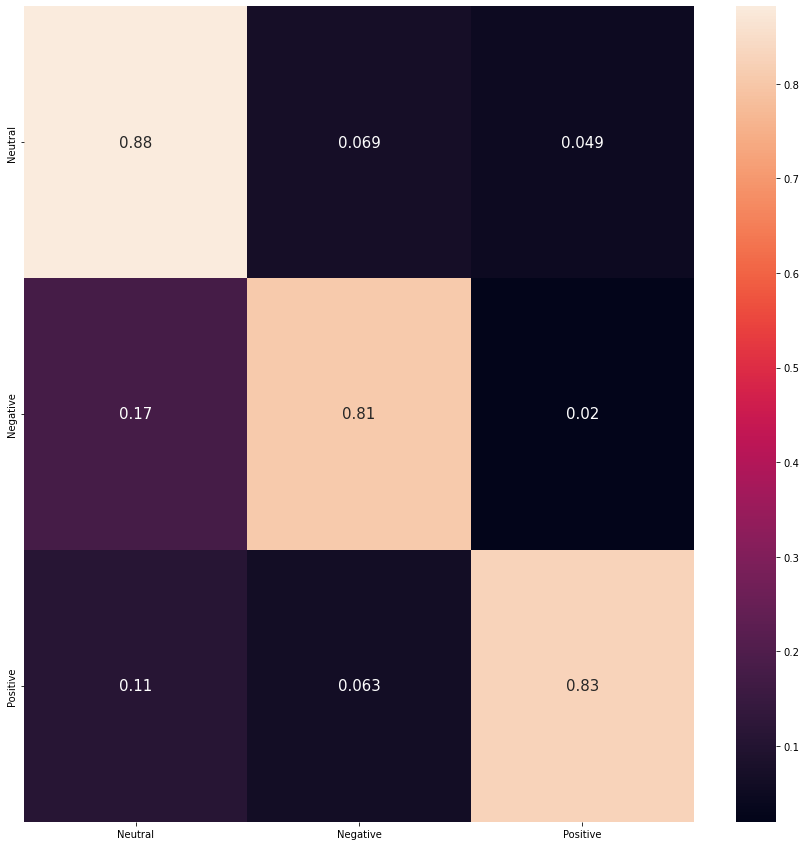

In [89]:
conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [90]:
sentiment = ['Neutral','Negative','Positive']

In [91]:
sequence = tokenizer.texts_to_sequences(['this experience has been the worst , want my money back'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 19ms/step


'Negative'

In [92]:
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 21ms/step


'Positive'

In [93]:
sequence = tokenizer.texts_to_sequences(['i hate youtube ads, they are annoying'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 20ms/step


'Negative'

In [94]:
sequence = tokenizer.texts_to_sequences(['i really loved how the technician helped me with the issue that i had'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

1/1 [==============================] - 0s 22ms/step


'Positive'

In [95]:
model_json = best_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
best_model.save_weights("model-weights.h5")
print("Model saved")


with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
print('Tokenizer saved')

Model saved
Tokenizer saved
